#Week 3: Decision Tree - Tennis
##Liam McKenzie

Preliminary machine setup for ID3, pandas, Sci-Kit and matplotlip

In [ ]:
!pip3 install decision-tree-id-fork # installs ID3

In [ ]:
import pandas as pd
import id3                  # Id3Estimator, export_text
from sklearn import tree    # DecisionTreeClassifier, export_text
from sklearn import metrics # accuracy_score
from sklearn.tree import plot_tree # plot tree
import matplotlib.pyplot as plt # graphics visualization

#Load and look at datasheet

In [ ]:
url = "https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/tennis.csv"
data = pd.read_csv(url)
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


###Entropy of the dataset

$H(S) = -p(yes) \log[2]p(yes) -p(no) \log[2]p(no)$

$p(yes) = -(9/14) \log[2]p(9/14) = 0.41$
$p(no) = -(5/14) \log[2]p(5/14) = 0.53$

$H(S) = p(yes)+p(no) =0.41+0.53 = 0.94$
      

In [ ]:
data[data.play=='yes'].count()

,0
outlook,9
temp,9
humidity,9
windy,9
play,9


In [ ]:
data[data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [ ]:
data[data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


### Entropy $H(S,outlook)$ and Information gain for **Outlook**

In [ ]:
data[data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


$E(Outlook= overcast)= -1 \log{1}-0\log{0} = 0$

In [ ]:
data[(data.outlook == 'sunny') & (data.play == 'yes')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


$E(Outlook= sunny)= -\frac{2}{5} \log\frac{2}{5}- \frac{3}{5} \log\frac{3}{5} = 0.97$

In [ ]:
data[(data.outlook == 'rainy') & (data.play == 'yes')]

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
9,rainy,mild,normal,False,yes


$E(Outlook= rainy)= -\frac{3}{5} \log\frac{3}{5}- \frac{2}{5} \log\frac{2}{5} = 0.97$

###Average information gain for **Outlook**
$I(outlook) = \sum_{t = outlook values} p(t)E(t)$
$I(outlook) = \frac{5}{14} * 0.97 + \frac{4}{14}*0 + \frac{5}{14}*0.97 = 0.69$

$Gain(outlook)=E(S) -I(outlook) =0.94-0.69 =0.24$


###Pick the attribute with highest information gain as the root node


*   $G(Outlook) = 0.94-0.69 = 0.24$
*   $G(Temperature) = 0.94-0.91 = 0.02$
*   $G(Humidity) = 0.94-0.78 = 0.15$
*   $G(Windy) = 0.94-0.89 = 0.04$



##Preprocessing
Because non-numeric data cannot be processed, these values must be encoded. Sci-Kit Learn has a module called LabelEncoder that is used here

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['outlook'] = Le.fit_transform(data['outlook'])
data['temp'] = Le.fit_transform(data['temp'])
data['humidity'] = Le.fit_transform(data['humidity'])
data['windy'] = Le.fit_transform(data['windy'])

##Splitting the data into features and target

In [ ]:
features= data.drop('play', axis=1)
target = data.play

##Model building

Sci-Kit Learn tree module is already imported so it can be used to build a decision tree using the ID3 classification algorithm

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree = dtree.fit(features, target)

[Ellipsis]

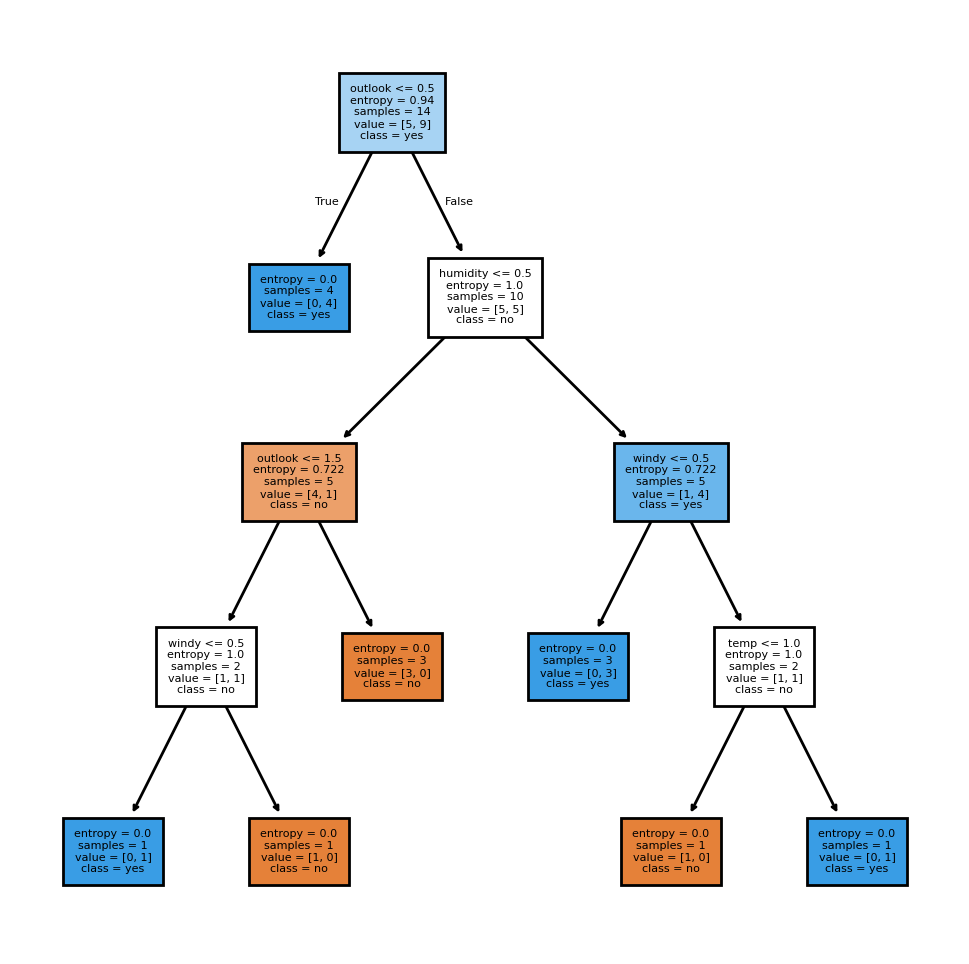

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6), dpi=200)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features.columns,
               class_names= target.unique())
[...]

Compare predicitons to model

In [ ]:
predictDF = pd.DataFrame(columns=['outlook', 'play'])
predictDF

,outlook,play


In [ ]:
predictions = dtree.predict(features)
print("The accuracy of our model is: {}%".format(metrics.accuracy_score(target, predictions)*100))

The accuracy of our model is: 100.0%


The model generated provides 100% predictive accuracy.